In [1]:
# install.packages("timedeppar")
# install.packages("readxl")

# libraries
set.seed(42)
library(readxl)
library(timedeppar)

##############
# reading data
#data   = read_excel("~/Scrivania/MOD B/esercizi/github/Project/data/syntheticData.xlsx", skip = 1)
data   = read_excel("~/data/syntheticData.xlsx", skip = 1)
data   = as.data.frame(data[c(1, 2, 4, 5, 7, 8)])
colnames(data) = c("t", "y", "t", "y", "t", "y")
data   = na.omit(data)
data1  = data[1:2]
data2  = data[3:4]
data3  = data[5:6]
n      = dim(data)[1]
n_interval = 40               # default: 50
n_iter     = 100000           # default: 10000
n_adapt    = 0.5 * n_iter
omega      = 2 * pi / 11                 # fixed (period T = 11)
count      = 0                           # fixed
max_count  = n_iter * (n_interval + 1)   # fixed
resol  = 3                               # default: 5
delta  = floor(max_count * resol / 100)
#
# time-dependent parameters
mu         = 1
tau        = 1
sigma_xi   = 0.02
#################


#######################################
# maker of vector of initial parameters
param_ini    = list(A        = 10,
					phi      = 2,
				    sigma_y  = 0.05,
				    xi       = data.frame(t  = 1:(n - 1),
										  xi = 1))

# turning off working with log-scale inside infer.timedeppar
param_logic  = c(A           = FALSE,
				 phi         = FALSE,
				 sigma_y     = TRUE,
				 xi          = TRUE)

# ranges initialization (both time-dependent and not)
param_ranges = list(A        = c(5,     15),
					phi      = c(0,      2 * pi),
					sigma_y  = c(0.01,  15),
					xi       = c(0.2,    1.8),
					xi_mean  = c(-4,     6),
					xi_sd    = c(0.005,  5),
					xi_gamma = c(0.005, 15))

# vector of initial values of parameters associated to time-dependent xi
param_ou_ini = c(xi_mean     = mu,
				 xi_sd       = sigma_xi * sqrt(2 / tau),
				 xi_gamma    = 1 / tau)
#######################################


########################
# loglikelihood function
loglikeli <- function(param) {
	xis       = param$xi$xi
	A         = param$A
	phi       = param$phi
	sigma_y   = param$sigma_y
	#
	# WORKING WITH xis:
	#y_likeli  = y - (A * cos(omega * (sum_{j=i}^{2}(xi_j) + 1) + phi)) / sigma_y
	y_likeli  = (A * cos(omega * c(1, cumsum(xis) + 1) + phi))
	y_likeli  = sum(dnorm(y_likeli, y, sigma_y, TRUE))
	#
	# feedback
	count <<- count + 1
	if (count %% delta == 0) {
		prog = count * resol / delta
		print(paste(prog, "%. loglikeli: ", y_likeli))
	}
	return(y_likeli)
}

logprior    <- function(param) {
	A         = param_ini$A
	phi       = param_ini$phi
	sigma_y   = param_ini$sigma_y
	#
	prior     = dnorm(param[["A"]],        A,        A / 2, TRUE) +   # A
				dnorm(param[["phi"]],      phi,      pi,    TRUE) +   # phi
				dnorm(param[["sigma_y"]],  sigma_y,  5,     TRUE)     # sigma_y
	#
	return(prior)
}

ou_logprior <- function(param) {
	xi_mean   = param_ou_ini[["xi_mean"]]
	xi_sd     = param_ou_ini[["xi_sd"]]
	xi_gamma  = param_ou_ini[["xi_gamma"]]
	#
	prior     = dnorm(param[["xi_mean"]],  xi_mean,  2,     TRUE) +   # sigma_xi
				dnorm(param[["xi_sd"]],    xi_sd,    2,     TRUE) +   # tau
				dnorm(param[["xi_gamma"]], xi_gamma, 3,     TRUE)     # mu
	#
	return(prior)
}

CALL <- function() {
	res <- infer.timedeppar(loglikeli           = loglikeli,
							loglikeli.keepstate = FALSE,
							param.ini           = param_ini,
							param.range         = param_ranges,
							param.log           = param_logic,
							param.logprior      = logprior,
							param.ou.ini        = param_ou_ini,
							param.ou.logprior   = ou_logprior,
							task                = "start",
							n.iter              = n_iter,
							verbose             = 0,
							control             = list(n.interval = n_interval,
													   n.adapt    = n_adapt))
	return(res)
}

#
#y = data1$y
#res1 = CALL()
#
#y = data2$y
#res2 = CALL()
#
y = data3$y
res3 = CALL()
#############

#saveRDS(res1, file = "res1.rds")
#saveRDS(res2, file = "res2.rds")
#saveRDS(res3, file = "res3.rds")
################################

#res1 <- readRDS("~/Scrivania/MOD B/esercizi/github/Project/res1.rds")
#res2 <- readRDS("~/Scrivania/MOD B/esercizi/github/Project/res2.rds")
#res3 <- readRDS("~/Scrivania/MOD B/esercizi/github/Project/res3.rds")
############################


Warning message:
“package ‘readxl’ was built under R version 4.3.3”
Loading required package: mvtnorm

New names:
• `Year` -> `Year...1`
• `cycle` -> `cycle...2`
• `` -> `...3`
• `Year` -> `Year...4`
• `cycle` -> `cycle...5`
• `` -> `...6`
• `Year` -> `Year...7`
• `cycle` -> `cycle...8`
infer.timedeppar (timedeppar 1.0.3 2023-08-28): starting new Markov Chain

  number of constant parameters:          3

  number of time-dependent parameters:    1

  number of estimated process parameters: 3



[1] "3 %. loglikeli:  -1067.04065723737"
[1] "6 %. loglikeli:  -1048.6792319276"
[1] "9 %. loglikeli:  -1040.1053899293"
[1] "12 %. loglikeli:  -1034.90612105021"
[1] "15 %. loglikeli:  -1023.31228606562"
[1] "18 %. loglikeli:  -1032.22561136911"
[1] "21 %. loglikeli:  -1031.80285634088"
[1] "24 %. loglikeli:  -38.5738373340335"
[1] "27 %. loglikeli:  -56.7222445123314"
[1] "30 %. loglikeli:  8.00950923497503"
[1] "33 %. loglikeli:  -446.737493522929"
[1] "36 %. loglikeli:  215.533584733909"
[1] "39 %. loglikeli:  -71.8002669228639"
[1] "42 %. loglikeli:  -768.62081428032"
[1] "45 %. loglikeli:  -242.288963205303"
[1] "48 %. loglikeli:  -779.14847069472"
[1] "51 %. loglikeli:  -64.5883031365849"
[1] "54 %. loglikeli:  284.730357248173"
[1] "57 %. loglikeli:  214.979905977413"
[1] "60 %. loglikeli:  -583.72978015385"
[1] "63 %. loglikeli:  -352.473758287696"
[1] "66 %. loglikeli:  210.584358074791"
[1] "69 %. loglikeli:  -523.160864357793"
[1] "72 %. loglikeli:  -113.764297818092"
[1] "

1e+05 iterations completed

  acceptance frequency of constant parameters:             0.161

  acceptance frequencies of time-dependent parameters:     0.00347

  acceptance frequencies of Ornstein-Uhlenbeck parameters: 0.187



plot.timedeppar (timedeppar 1.0.3 2023-08-28): plotting inference results: traces,marginals,summary,pairs,time-series,accept



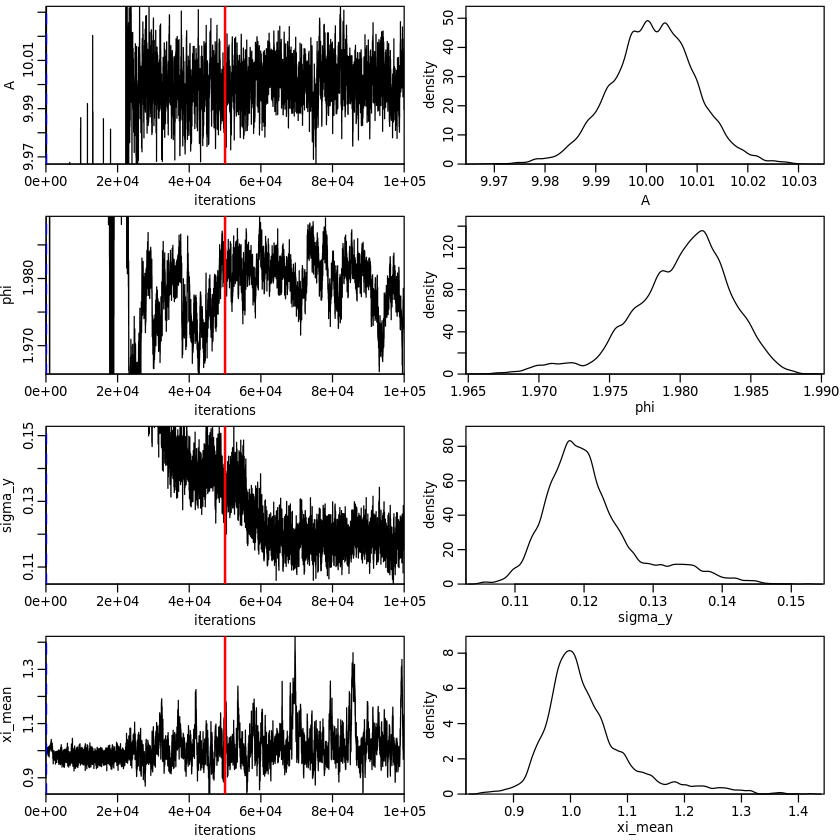

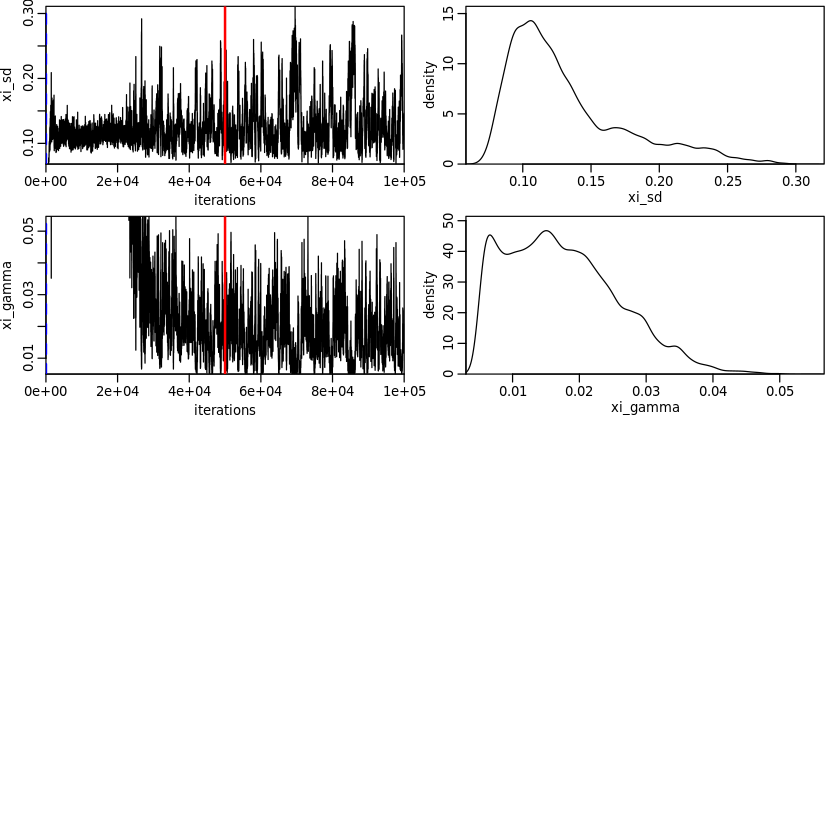

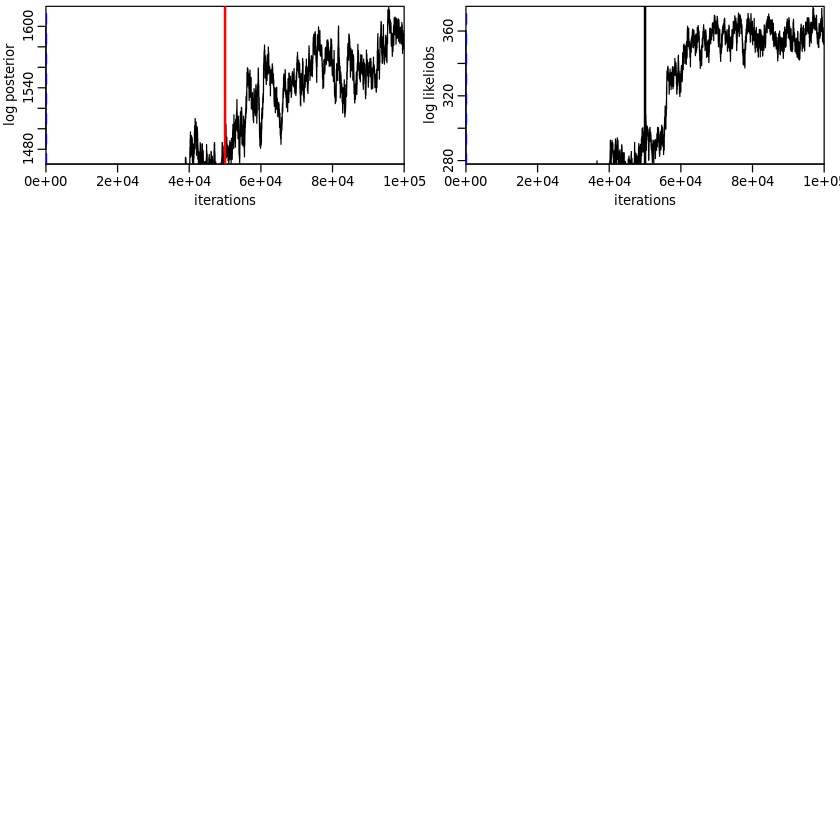

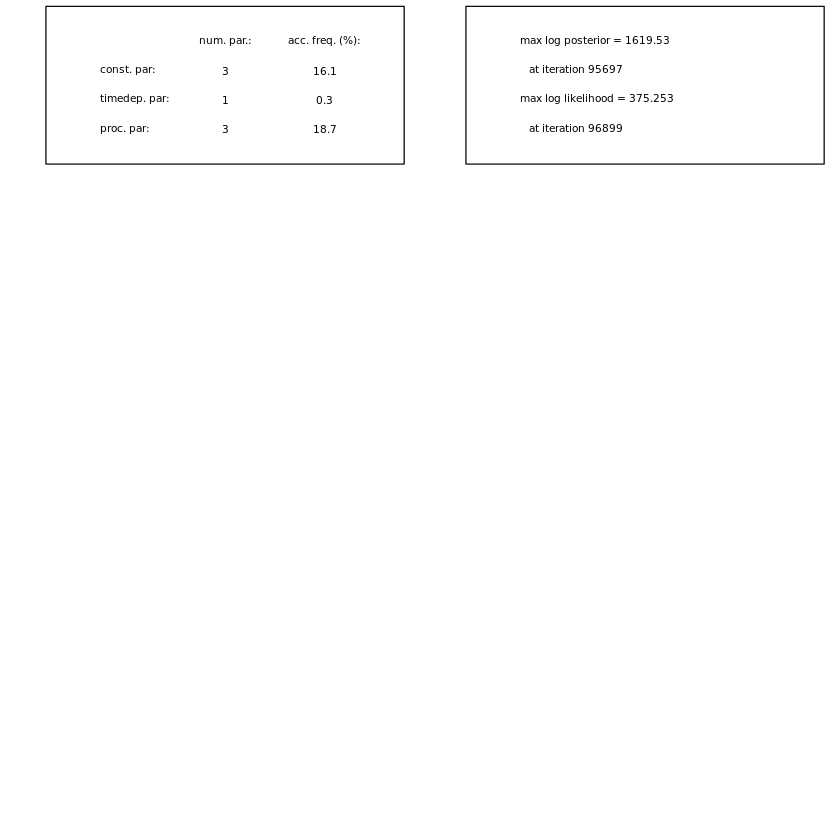

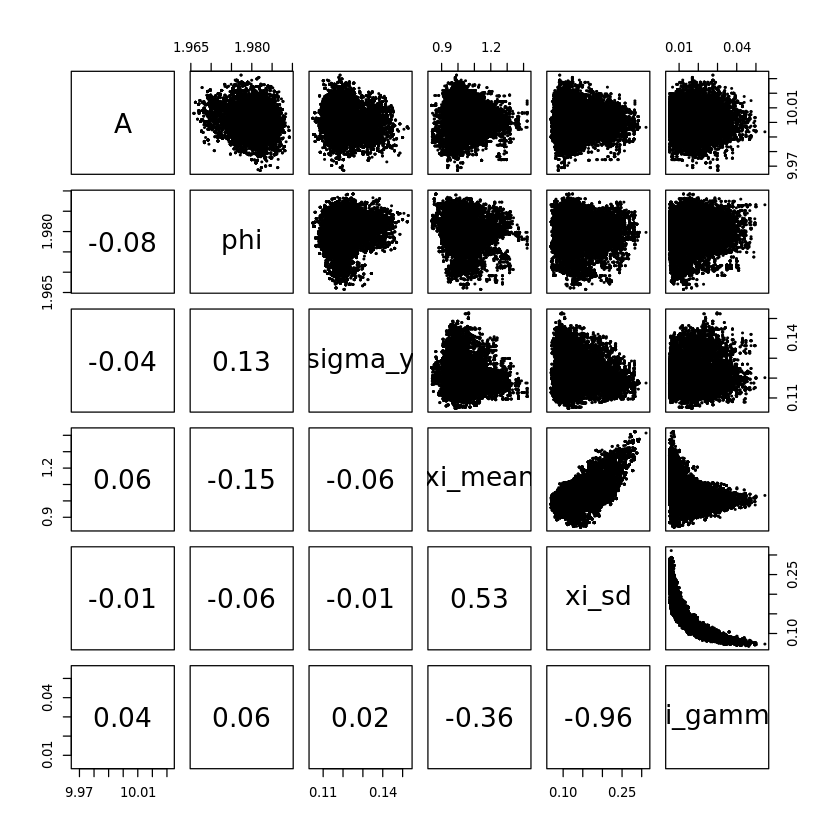

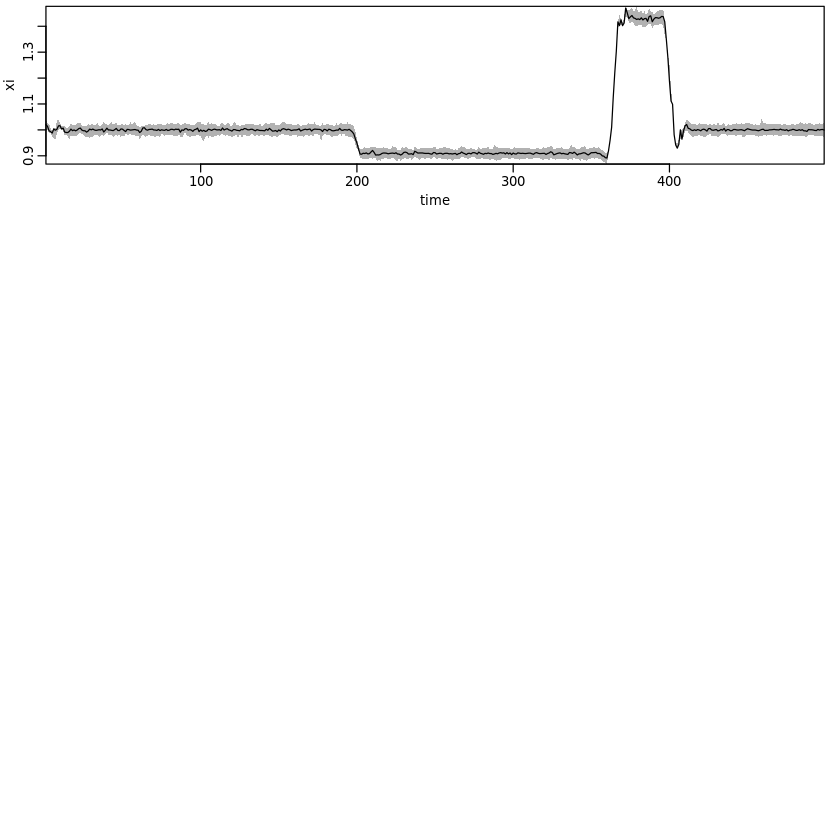

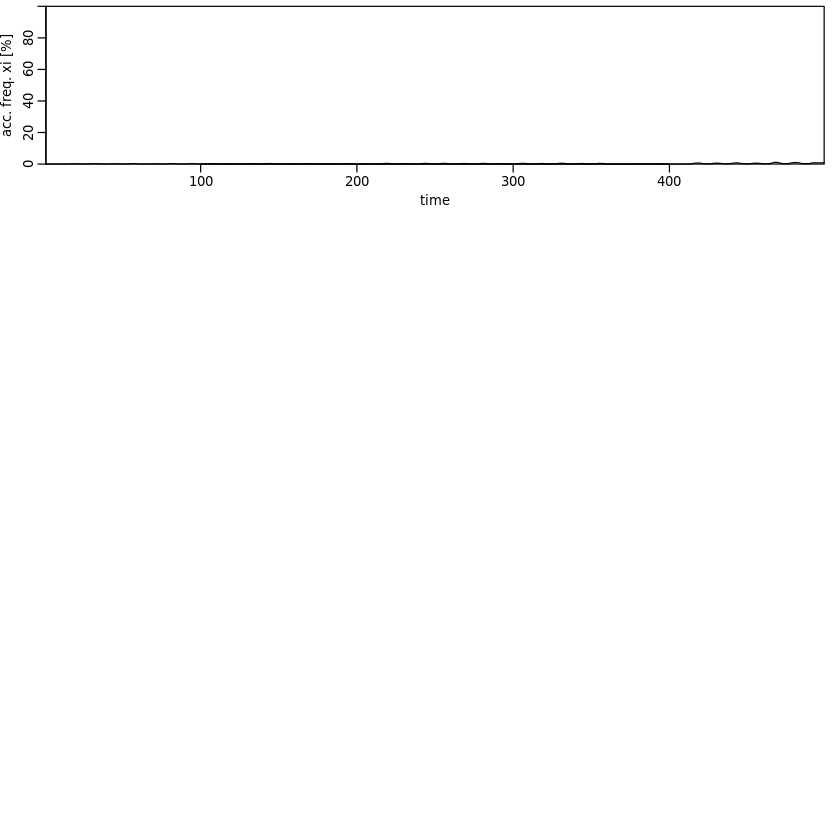

In [2]:
plot(res3)